NO 1
EDA

Impor Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Membaca Dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet.csv')

In [5]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
# Jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (2111, 17)


In [10]:
# Info tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [11]:
# Deskripsi statistik untuk data numerik
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [12]:
# Cek missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [13]:
# Cek jumlah nilai unik setiap kolom
print("\nNilai Unik Tiap Kolom:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Nilai Unik Tiap Kolom:
Age: 1394
Gender: 3
Height: 1562
Weight: 1518
CALC: 5
FAVC: 3
FCVC: 808
NCP: 637
SCC: 3
SMOKE: 3
CH2O: 1263
family_history_with_overweight: 3
FAF: 1186
TUE: 1130
CAEC: 5
MTRANS: 6
NObeyesdad: 7


In [14]:
# Cek duplikat
print("\nJumlah Duplikat:", df.duplicated().sum())


Jumlah Duplikat: 18


<ipython-input-15-4094571360>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='Set2')


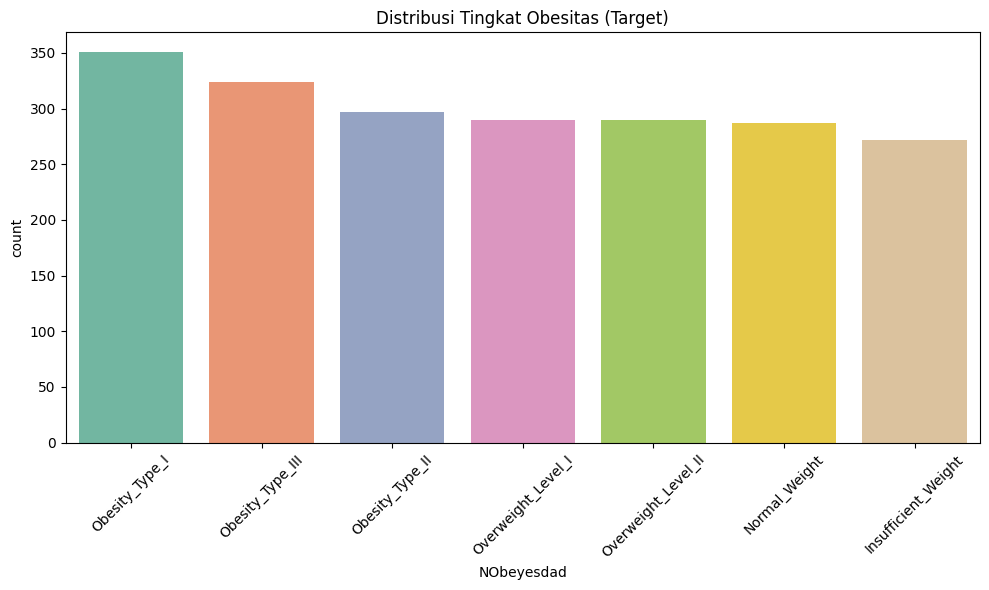

In [15]:
# Visualisasi distribusi kolom target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribusi Tingkat Obesitas (Target)')
plt.tight_layout()
plt.show()

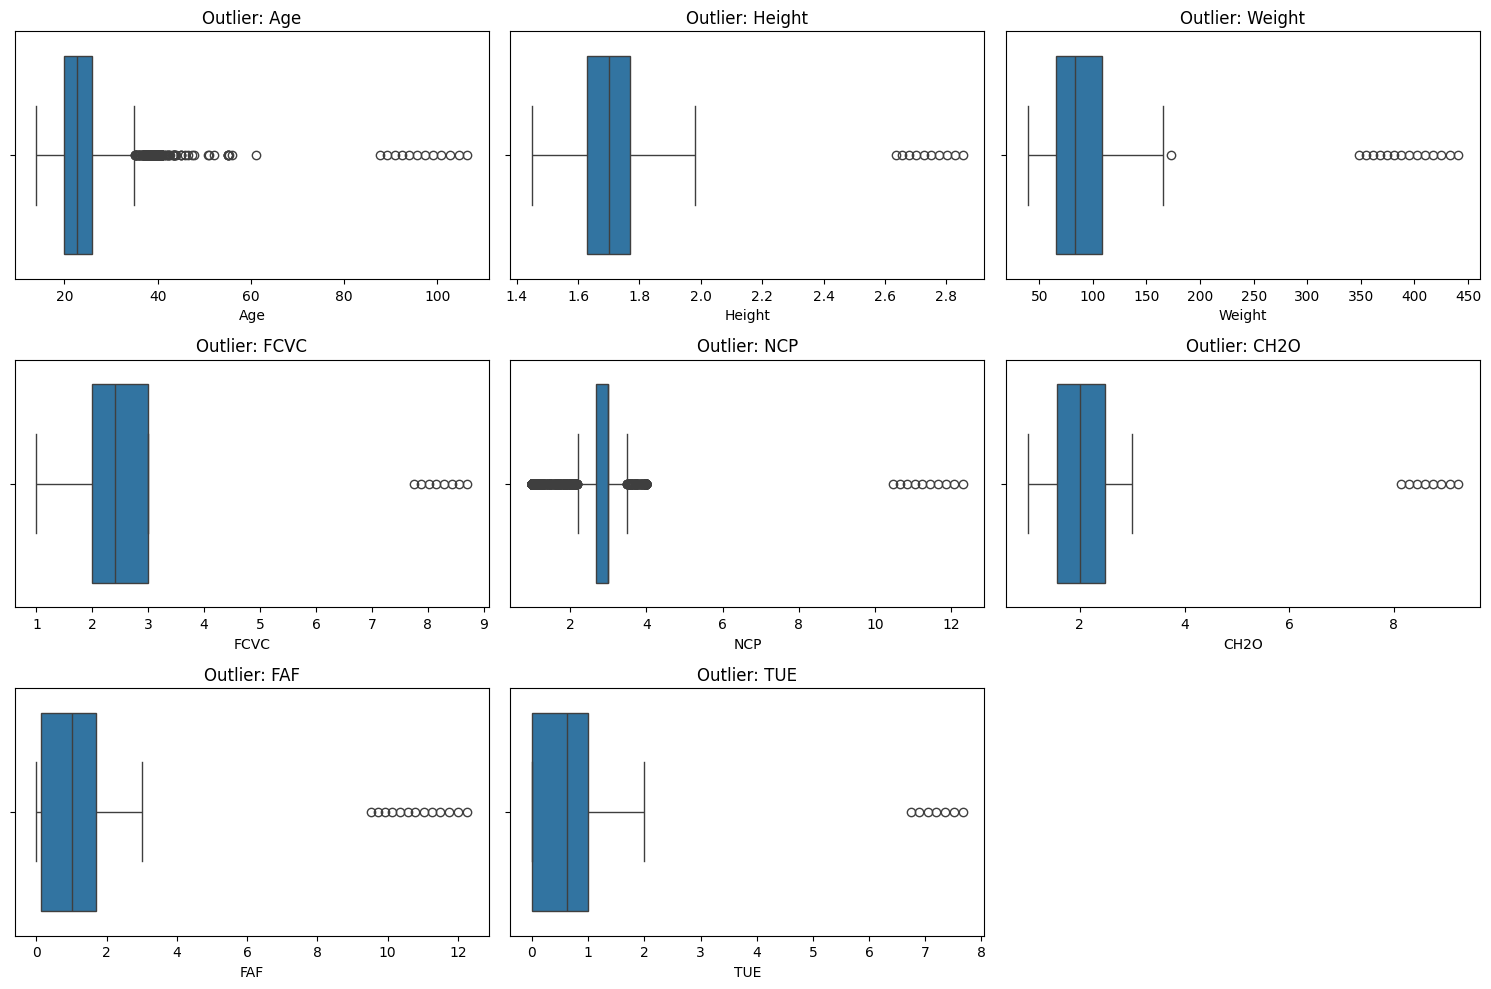

In [19]:
# Boxplot untuk outlier
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Outlier: {col}')
plt.tight_layout()
plt.show()

NO 2 Preprocessing Data

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet.csv')

In [22]:
# Cek dan hapus duplikasi
df = df.drop_duplicates()

# Cek kembali missing values
print("Missing Values:\n", df.isnull().sum())

# Tidak ada missing values atau error yang mencolok

Missing Values:
 Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [24]:
# Pastikan Age, Height, dan Weight bertipe numerik
cols_to_fix = ['Age', 'Height', 'Weight']
for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus baris dengan nilai NaN (hasil dari konversi error string jadi NaN)
df = df.dropna(subset=cols_to_fix)

# Fungsi hapus outlier
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Terapkan untuk kolom numerik
for col in cols_to_fix:
    df = remove_outliers_iqr(df, col)


In [25]:
# Label encoding untuk kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [26]:
# Korelasi dengan target
correlations = df.corr()['NObeyesdad'].sort_values(ascending=False)
print("Korelasi dengan target:\n", correlations)

# (Opsional) Di sini kita tetap gunakan semua fitur karena korelasinya bervariasi

Korelasi dengan target:
 NObeyesdad                        1.000000
Weight                            0.415865
family_history_with_overweight    0.331423
CAEC                              0.303291
Age                               0.283367
CH2O                              0.095957
FAVC                              0.055022
Height                            0.032807
Gender                            0.024662
FCVC                              0.008996
MTRANS                            0.007230
SCC                              -0.034296
SMOKE                            -0.036600
TUE                              -0.056131
NCP                              -0.080049
FAF                              -0.108511
CALC                             -0.154618
Name: NObeyesdad, dtype: float64


In [27]:
# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Gunakan SMOTE untuk balancing
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Cek distribusi baru
print("Distribusi Setelah SMOTE:\n", pd.Series(y_res).value_counts())

Distribusi Setelah SMOTE:
 NObeyesdad
1    305
5    305
6    305
2    305
0    305
3    305
4    305
Name: count, dtype: int64


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

NO 3

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# Inisialisasi model
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

In [42]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0),
        'Classification Report': classification_report(y_test, y_pred, zero_division=0),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

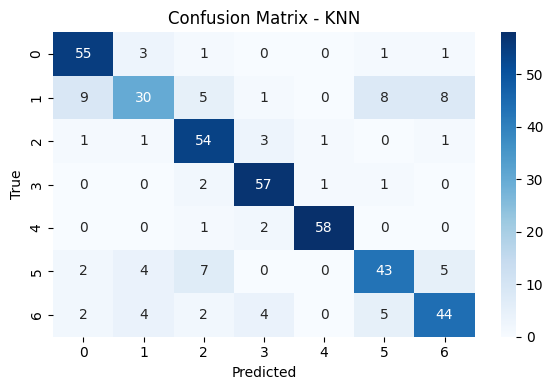

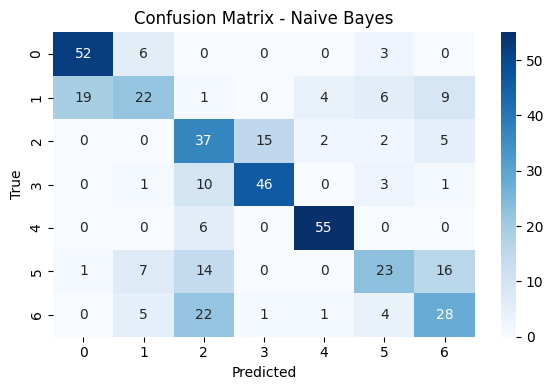

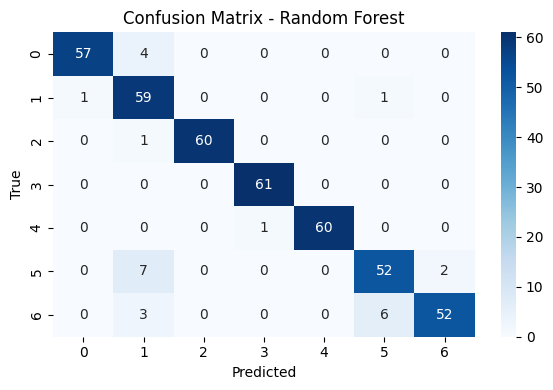

In [43]:
for name in results:
    plt.figure(figsize=(6, 4))
    sns.heatmap(results[name]['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

In [45]:
for name in results:
    print(f"\n{name} - Classification Report:\n")
    print(results[name]['Classification Report'])


KNN - Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        61
           1       0.71      0.49      0.58        61
           2       0.75      0.89      0.81        61
           3       0.85      0.93      0.89        61
           4       0.97      0.95      0.96        61
           5       0.74      0.70      0.72        61
           6       0.75      0.72      0.73        61

    accuracy                           0.80       427
   macro avg       0.80      0.80      0.79       427
weighted avg       0.80      0.80      0.79       427


Naive Bayes - Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        61
           1       0.54      0.36      0.43        61
           2       0.41      0.61      0.49        61
           3       0.74      0.75      0.75        61
           4       0.89      0.90      0.89        61
        

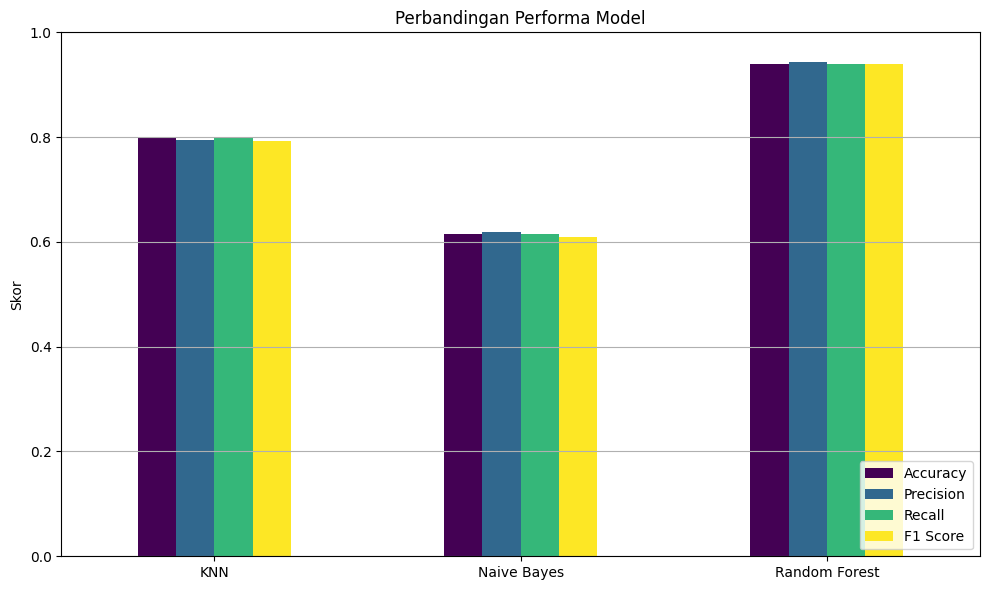

In [46]:
# Buat dataframe perbandingan
comparison_df = pd.DataFrame({
    model: {
        'Accuracy': results[model]['Accuracy'],
        'Precision': results[model]['Precision'],
        'Recall': results[model]['Recall'],
        'F1 Score': results[model]['F1 Score']
    }
    for model in results
}).T

# Visualisasi
comparison_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Perbandingan Performa Model')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

4

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Naive Bayes': {
        # Tidak banyak parameter untuk GaussianNB, tapi kita coba var_smoothing
        'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'criterion': ['gini', 'entropy']
    }
}

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

base_models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [50]:
tuned_results = {}
best_models = {}

for name in base_models:
    grid = GridSearchCV(estimator=base_models[name],
                        param_grid=param_grid[name],
                        cv=5,
                        scoring='f1_weighted',
                        n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model

    # Prediksi dan evaluasi
    y_pred = best_model.predict(X_test)
    tuned_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0),
        'Best Params': grid.best_params_,
        'Classification Report': classification_report(y_test, y_pred, zero_division=0),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

In [51]:
for name in tuned_results:
    print(f"{name} - Best Parameters: {tuned_results[name]['Best Params']}")

KNN - Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Naive Bayes - Best Parameters: {'var_smoothing': 1e-06}
Random Forest - Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 150}


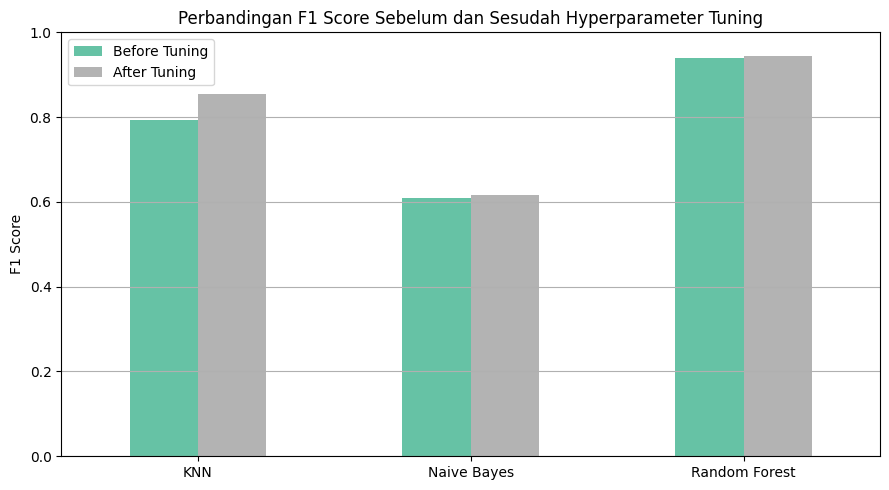

In [52]:
# Buat data frame perbandingan
before_after_df = pd.DataFrame({
    'Before Tuning': {model: results[model]['F1 Score'] for model in results},
    'After Tuning': {model: tuned_results[model]['F1 Score'] for model in tuned_results}
})

# Plot perbandingan
before_after_df.plot(kind='bar', figsize=(9, 5), colormap='Set2')
plt.title('Perbandingan F1 Score Sebelum dan Sesudah Hyperparameter Tuning')
plt.ylabel('F1 Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



===== KNN (After Tuning) =====
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        61
           1       0.77      0.56      0.65        61
           2       0.89      0.93      0.91        61
           3       0.95      0.97      0.96        61
           4       0.95      1.00      0.98        61
           5       0.75      0.85      0.80        61
           6       0.79      0.82      0.81        61

    accuracy                           0.86       427
   macro avg       0.86      0.86      0.86       427
weighted avg       0.86      0.86      0.86       427



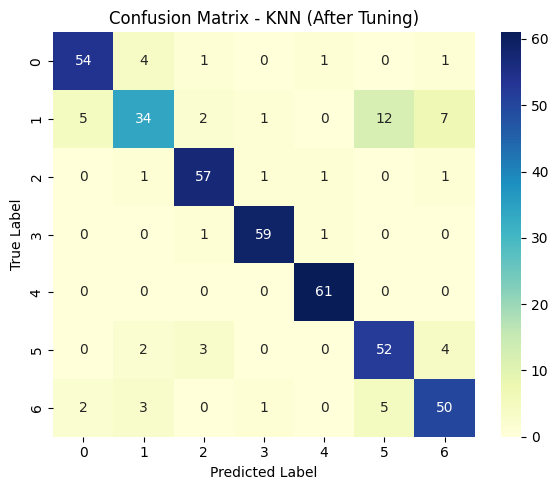


===== Naive Bayes (After Tuning) =====
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        61
           1       0.55      0.38      0.45        61
           2       0.41      0.61      0.49        61
           3       0.74      0.75      0.75        61
           4       0.96      0.90      0.93        61
           5       0.56      0.38      0.45        61
           6       0.48      0.48      0.48        61

    accuracy                           0.62       427
   macro avg       0.63      0.62      0.62       427
weighted avg       0.63      0.62      0.62       427



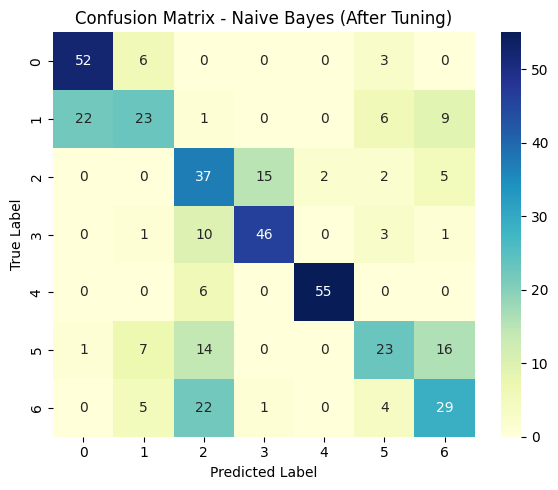


===== Random Forest (After Tuning) =====
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        61
           1       0.80      0.98      0.88        61
           2       0.98      0.98      0.98        61
           3       0.98      1.00      0.99        61
           4       1.00      0.98      0.99        61
           5       0.90      0.87      0.88        61
           6       0.98      0.85      0.91        61

    accuracy                           0.94       427
   macro avg       0.95      0.94      0.94       427
weighted avg       0.95      0.94      0.94       427



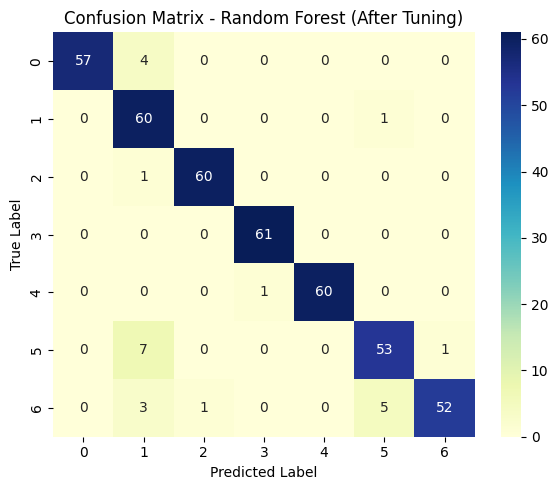

In [53]:
for name in tuned_results:
    print(f"\n===== {name} (After Tuning) =====")
    print("Classification Report:")
    print(tuned_results[name]['Classification Report'])

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(tuned_results[name]['Confusion Matrix'],
                annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix - {name} (After Tuning)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


5